#Часть 1: Общий пример

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

print("Форма обучающих данных:", train_images.shape)
print("Форма тестовых данных:", test_images.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Форма обучающих данных: (50000, 32, 32, 3)
Форма тестовых данных: (10000, 32, 32, 3)


In [ ]:
print("Доступные устройства:", tf.config.list_physical_devices())
print("Используется ли GPU:", tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Доступные устройства: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Используется ли GPU: True


In [ ]:
model = models.Sequential([
    #Здесь используем padding, чтобы не уменьшать сильно размерность
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),

    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_data=(test_images, test_labels))

model.save('cifar10_cnn.h5')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.2982 - loss: 1.8230 - val_accuracy: 0.5293 - val_loss: 1.2870
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5662 - loss: 1.1850 - val_accuracy: 0.6291 - val_loss: 1.0489
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6623 - loss: 0.9555 - val_accuracy: 0.6966 - val_loss: 0.8626
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7246 - loss: 0.7821 - val_accuracy: 0.7393 - val_loss: 0.7574
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7614 - loss: 0.6795 - val_accuracy: 0.7570 - val_loss: 0.6972
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7922 - loss: 0.5925 - val_accuracy: 0.7521 - val_loss: 0.7244
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8198 - loss: 0.5221 - val_accuracy: 0.7856 - val_loss: 0.6225
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8407 - loss: 0.458

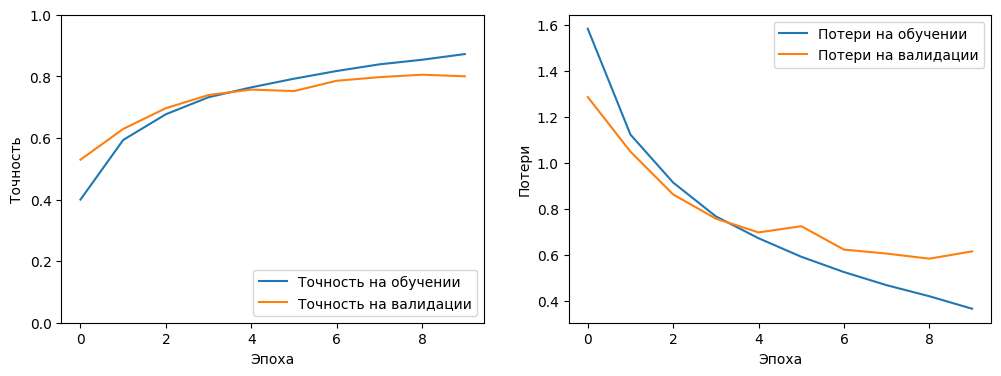

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучении')
plt.plot(history.history['val_loss'], label='Потери на валидации')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend(loc='upper right')

plt.show()

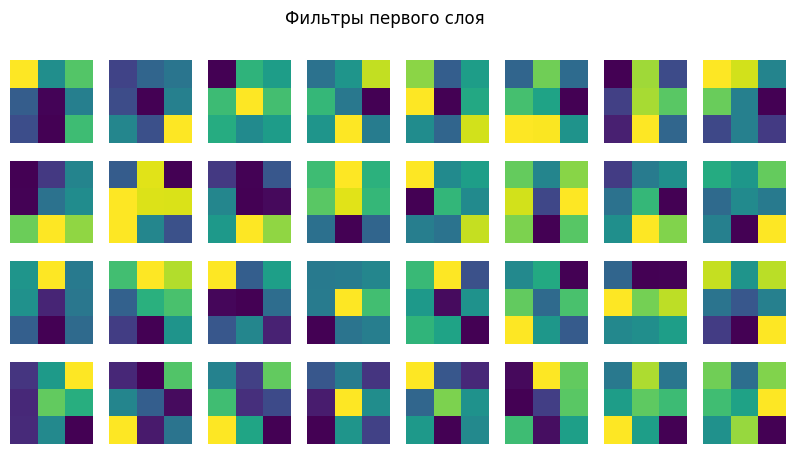

In [ ]:
first_layer_weights = model.layers[0].get_weights()[0]
plt.figure(figsize=(10, 5))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(first_layer_weights[:, :, 0, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Фильтры первого слоя')
plt.show()

#Часть 2: Индивидуальные задания

In [ ]:
def build_custom_model(filters=32, kernel_size=(3,3), activation='relu'):
    model = models.Sequential([
        layers.Conv2D(filters, kernel_size, activation=activation, input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(filters*2, kernel_size, activation=activation),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(filters*2, kernel_size, activation=activation),

        layers.Flatten(),
        layers.Dense(64, activation=activation),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

params = [
    {'filters': 32, 'kernel_size': (3,3), 'activation': 'relu'},
    {'filters': 64, 'kernel_size': (5,5), 'activation': 'sigmoid'},
    {'filters': 128, 'kernel_size': (3,3), 'activation': 'relu'}
]

histories = []
for i, param in enumerate(params):
    print(f"\nМодель {i+1} с параметрами: {param}")
    model = build_custom_model(**param)
    history = model.fit(train_images, train_labels,
                        epochs=10,
                        validation_data=(test_images, test_labels),
                        verbose=0)
    histories.append((param, history))


Модель 1 с параметрами: {'filters': 32, 'kernel_size': (3, 3), 'activation': 'relu'}

Модель 2 с параметрами: {'filters': 64, 'kernel_size': (5, 5), 'activation': 'sigmoid'}

Модель 3 с параметрами: {'filters': 128, 'kernel_size': (3, 3), 'activation': 'relu'}


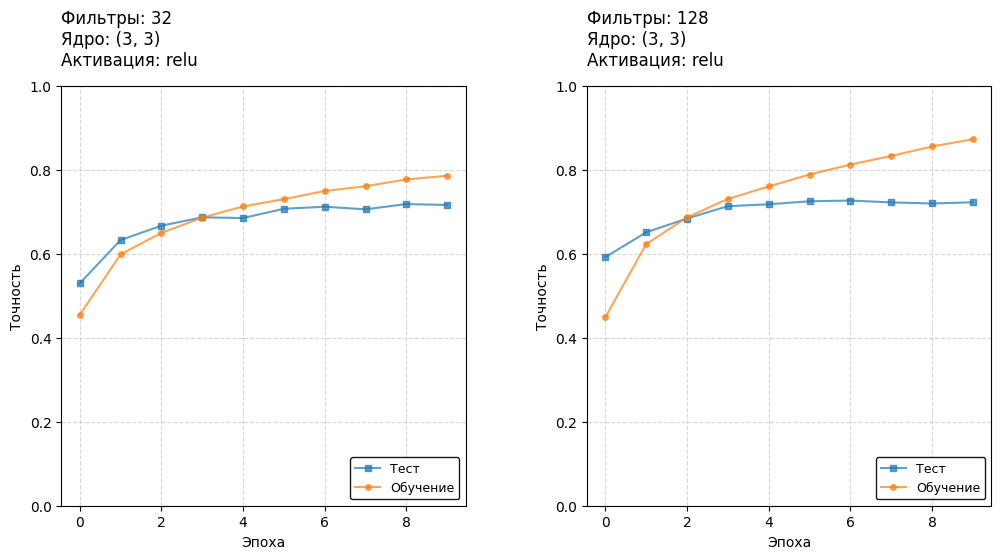

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plot_indices = [0, 2]

for plot_num, i in enumerate(plot_indices):
    param, history = histories[i]

    plt.subplot(1, 2, plot_num + 1, aspect='auto')
    plt.plot(history.history['val_accuracy'],
             's-',
             markersize=4,
             alpha=0.7,
             label='Тест')

    plt.plot(history.history['accuracy'],
             'o-',
             markersize=4,
             alpha=0.7,
             label='Обучение')

    title_text = (f"Фильтры: {param['filters']}\n"
                  f"Ядро: {param['kernel_size']}\n"
                  f"Активация: {param['activation']}")

    plt.title(title_text,
              fontsize=12,
              pad=15,
              loc='left')

    plt.xlabel('Эпоха', fontsize=10)
    plt.ylabel('Точность', fontsize=10)
    plt.ylim([0.0, 1.0])

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(framealpha=0.9,
               edgecolor='black',
               fontsize=9,
               loc='lower right')

plt.subplots_adjust(top=0.85,
                    wspace=0.3,
                    bottom=0.15)

plt.show()

#Часть 3: Защита и интерпретация результатов


In [ ]:
from sklearn.metrics import classification_report, f1_score

for i, (param, history) in enumerate(histories):
    model = build_custom_model(**param)
    history = model.fit(train_images, train_labels, epochs=10, verbose=0,
                       validation_data=(test_images, test_labels))
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(test_labels, axis=1)

    print(f"\nМодель {i+1} с параметрами: {param}")
    print(f"Train Accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Test Accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"Loss (val): {history.history['val_loss'][-1]:.4f}")
    print("F1-мера:", f1_score(y_true, y_pred_classes, average='macro'))
    print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Модель 1 с параметрами: {'filters': 32, 'kernel_size': (3, 3), 'activation': 'relu'}
Train Accuracy: 0.7902
Test Accuracy: 0.7062
Loss (val): 0.8934
F1-мера: 0.706081306846762
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      1000
           1       0.82      0.83      0.82      1000
           2       0.59      0.64      0.61      1000
           3       0.57      0.50      0.53      1000
           4       0.61      0.66      0.64      1000
           5       0.63      0.62      0.62      1000
           6       0.67      0.86      0.76      1000
           7       0.82      0.68      0.74      1000
           8       0.86      0.76      0.80      1000
           9       0.82      0.76      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Модель 2 с параметрами: {'filters': 64, 'kernel_size': (5, 5), 'activation': 'sigmoid'}
Train Accuracy: 0.5829
Test Accuracy: 0.5448
Loss (val): 1.2880
F1-мера: 0.5338040171987178
              precision    recall  f1-score   support

           0       0.56      0.67      0.61      1000
           1       0.57      0.83      0.67      1000
           2       0.38      0.48      0.43      1000
           3       0.49      0.20      0.29      1000
           4       0.48      0.49      0.49      1000
           5       0.50      0.37      0.43      1000
           6       0.70      0.54      0.61      1000
           7       0.55      0.67      0.61      1000
           8       0.63      0.67      0.65      1000
           9       0.62      0.53      0.57      1000

    accuracy                           0.54     10000
   macro avg       0.55      0.54      0.53     10000
weighted avg       0.55      0.54      0.53     10000



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Модель 3 с параметрами: {'filters': 128, 'kernel_size': (3, 3), 'activation': 'relu'}
Train Accuracy: 0.8354
Test Accuracy: 0.7223
Loss (val): 0.8939
F1-мера: 0.7184671834224844
              precision    recall  f1-score   support

           0       0.80      0.70      0.74      1000
           1       0.81      0.88      0.84      1000
           2       0.64      0.58      0.61      1000
           3       0.60      0.47      0.53      1000
           4       0.63      0.73      0.67      1000
           5       0.66      0.58      0.62      1000
           6       0.65      0.89      0.75      1000
           7       0.81      0.71      0.76      1000
           8       0.78      0.88      0.83      1000
           9       0.87      0.80      0.83      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.2801 - loss: 1.8907 - val_accuracy: 0.5117 - val_loss: 1.3142
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.5454 - loss: 1.2318 - val_accuracy: 0.6284 - val_loss: 1.0367
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6509 - loss: 0.9877 - val_accuracy: 0.6953 - val_loss: 0.8589
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7101 - loss: 0.8211 - val_accuracy: 0.7210 - val_loss: 0.8101
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7555 - loss: 0.7032 - val_accuracy: 0.7481 - val_loss: 0.7447
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7852 - loss: 0.6144 - val_accuracy: 0.7620 - val_loss: 0.6776
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8094 - loss: 0.5523 - val_accuracy: 0.7702 - val_loss: 0.6594
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8263 - loss: 0.5006 

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_65']
Received: inputs=Tensor(shape=(1, 32, 32, 3))
  warnings.warn(msg)


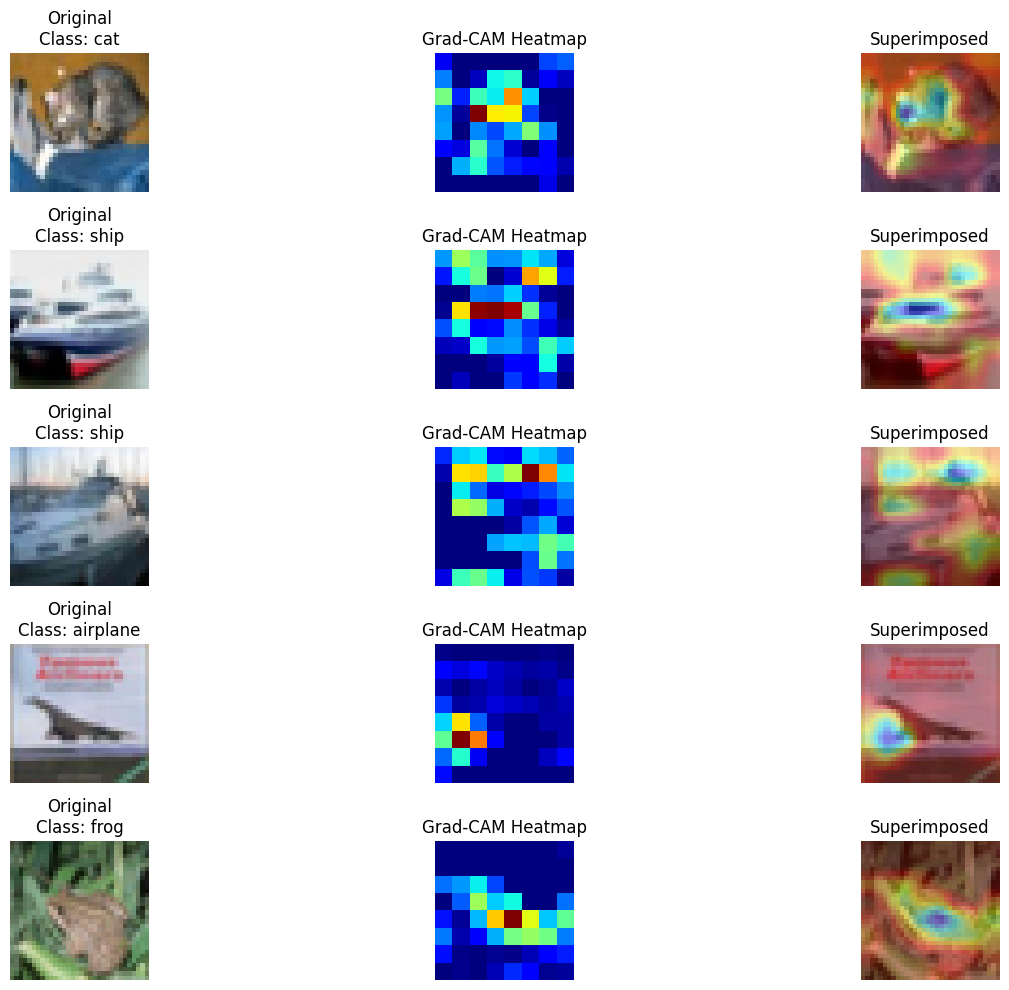

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import cv2

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

def build_model():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv1')(inputs)
    x = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv2')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)

    x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', name='conv3')(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', name='conv4')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)

    x = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu', name='conv5')(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu', name='last_conv')(x)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

model = build_model()
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

def make_gradcam_heatmap(img_array, model, last_conv_layer_name='last_conv'):
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        pred_index = tf.argmax(predictions[0])
        loss = predictions[:, pred_index]

    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(conv_outputs, pooled_grads), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap

sample_images = test_images[:5]
sample_labels = test_labels[:5].flatten()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15, 10))
for i, (img, label) in enumerate(zip(sample_images, sample_labels)):
    img_array = np.expand_dims(img, axis=0)
    heatmap = make_gradcam_heatmap(img_array, model)

    plt.subplot(5, 3, 3*i+1)
    plt.imshow(img)
    plt.title(f"Original\nClass: {class_names[label]}")
    plt.axis('off')

    plt.subplot(5, 3, 3*i+2)
    plt.imshow(heatmap, cmap='jet')
    plt.title("Grad-CAM Heatmap")
    plt.axis('off')

    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted((img * 255).astype(np.uint8), 0.6, heatmap, 0.4, 0)

    plt.subplot(5, 3, 3*i+3)
    plt.imshow(superimposed_img)
    plt.title("Superimposed")
    plt.axis('off')

plt.tight_layout()
plt.show()